In [10]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing

In Data8.2x, you have been using simulation to conduct hypothesis testing. Now that we have completed Data8.2x, this is a good time to take a step back and reflect on hypothesis testing. 

Every hypothesis test has roughly the same structure. The following 4 steps provide a rough outline:

1) State the null and alternate hypotheses. Generally, the alternate hypothesis is what you are trying to show. Essentially, if you want to show a result, we assume the opposite is true and try to prove ourselves wrong. 

2) Determine/calculate a test statistic. See your book for a formal definition, but generally, the test statistic is any quantity that helps us evaluate our sample with respect to our null hypothesis. 

3) Determine distribution of test statistic and compute a $p$-value. If you have taken inferential statistics before, you likely computed a $z$ or $t$ statistic and used a calculator or table to compute a $p$-value. This is based on asymptotic theory of sample means/proportions. This is not the approach taken in Data8.2x. With better computing power, we can use simulation to obtain an empirical distribution of our test statistic under the null hypothesis. 

4) Conclude. For low $p$-value (generally below 0.05), we reject the null hypothesis. For high $p$-value, we fail to reject. Low $p$-value implies that our sample would be very unusual if the null hypothesis were actually true. Therefore, that is evidence that the null hypothesis is wrong. 

### Example

Let's work through an example. Suppose that in the upcoming election, Referendum A is up for approval in Colorado. You suspect that in El Paso County, more than half of eligible voters support the referendum. You collect a random sample of 200 eligible voters in El Paso County and 115 of them express support. Is there evidence to conclude that supports your suspicion? 

#### Step 1: Hypothesis

State the null and alternative hypotheses.

Null hypothesis: No more than half (or exactly half) of eligible voters in El Paso County support the referendum. 

Alternate hypothesis: More than 50% of eligible voters in El Paso County support the referendum.

If $p$ represents the proportion of eligible El Paso County voters that support the referendum,

$$
H_0: p= 0.5 \mbox{  or   } H_0: p\leq 0.5
$$

$$
H_1 (\mbox{ or } H_a): p>0.5
$$

#### Step 2: Test Statistic

Select a test statistic and compute that test statistic for the sample.

The best test statistic for this test would simply be the sample proportion of voters who support the referendum (115 out of 200). 

$$
\hat{p} = 115/200 = 0.575
$$

#### Step 3: $p$-value

3a) If $H_0$ were true, what should the value of $\hat{p}$ be close to? In other words, if in fact, half of eligible voters support the referendum, what value should your test statistic take? 

If $H_0$ were true, $\hat{p}$ should be around 0.5.

3b) In words (and in the context of this problem), describe what the $p$-value is. 

$p$-value: the probability, in a sample of 200, of seeing at least 115 supporters, assuming actual level of support is 50%.  

3c) Find the $p$-value directly and using simulation. Hint: the binomial distribution will be of use here. 

In [24]:
1-stats.binom.cdf(114,200,0.5)

0.020018595806698514

In [31]:
ts=stats.binom.rvs(200,0.5,size=10000)

In [32]:
np.mean(ts>=115)

0.0207

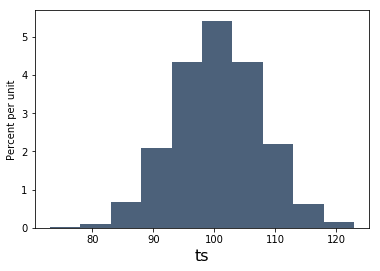

In [13]:
Table().with_column("ts",ts).hist("ts")

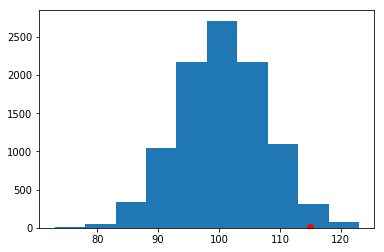

In [17]:
plt.hist(ts)
plt.plot(115,10,"or")
plt.show()

#### Step 4: Conclude

What is your conclusion? Be sure to state your conclusion in the context of the problem.

Based on a 0.05 threshold, I would reject $H_0$ and conclude that support for the referendum among eligible El Paso County voters exceeds 50%. It should be noted that while the $p$-value does meet the 0.05 "requirement", it is not by much. The evidence is statistically significant, but not overwhelming. 

## Confidence Intervals

Construct and interpret a 95% confidence interval on $p$, the true proportion of eligible El Paso County voters who support the referendum. There are many ways to construct such an interval (bootstrap, the binomial distribution, asymptotically). Select one and implement. 

Also, compare your interval to the results of your hypothesis test. Does your interval contain the value 0.5? Why does that matter? 

#### Using bootstrap method

In [55]:
#np.array(np.ones(5),np.zeros(5))
observations=Table().with_column("obs",np.append(np.ones(115),np.zeros(85)))

In [61]:
emp_ts=[]
for _ in np.arange(10000):
    emp_ts=np.append(emp_ts,np.mean(observations.sample(200,with_replacement=True).column(0)))
    

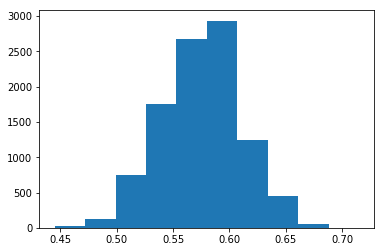

In [64]:
plt.hist(emp_ts)
plt.show()

In [69]:
percentile(np.array([2.5,97.5]),emp_ts)

array([0.505, 0.645])

#### Directly using the binomial distribution: 

In [43]:
probs=Table().with_columns("ps",np.arange(0.6,0.8,0.0001),"prs",stats.binom.cdf(115,200,np.arange(0.6,0.8,0.0001)))
probs.where(probs.column("prs")<=0.025).column(0).take(0)

0.6444999999999951

In [46]:
probs=Table().with_columns("ps",np.arange(0.4,0.6,0.0001),"prs",1-stats.binom.cdf(115,200,np.arange(0.4,0.6,0.0001)))
probs.where(probs.column("prs")<=0.025).column(0).take(-1)

0.5082999999999881

#### Using an estimate based on asymptotics (may be from AP stats). 

In [70]:
(115/200)+np.array([-1,1])/sqrt(200)

array([0.50428932, 0.64571068])

In [71]:
(115/200)+np.array([-1,1])*1.96*sqrt((115/200)*(1-115/200)/200)

array([0.50648756, 0.64351244])

In each method, I obtained a similar confidence interval (about 0.505 to 0.645). I am 95% confident that the true value of $p$ is in this interval. Also, 95% of similarly constructed intervals would contain the true value of $p$. Another way to think about this interval is as a range of *feasible* values of $p$. Values outside of this interval would be considered not feasible given our sample. 

Note that since this value does not contain 0.5, that is evidence that $p$ is not equal to 0.5. 